<h1>Machine Learning Project - MecedesBenz Manufacturing</h1>
   

<h2>1. Import Libaray</h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

<h2>2. Import Training & Test Dataset</h2>

In [2]:
df_train = pd.read_csv('train.csv', header=0)
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.shape

(4209, 378)

In [40]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [4]:
df_test = pd.read_csv('test.csv', header=0)
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_test.shape

(4209, 377)

<h2>3. Data Cleaning</h2>

<h4>3.1. Remove Non-Relevent Features like Y & ID</h4>

In [6]:
X_train= df_train.drop(['y','ID'], axis=1)
X_test = df_test.drop(['ID'], axis = 1)
y_label = df_train['y']
print('Training Set: {}'.format(X_train.shape))
print('Training Label: {}'.format(y_label.shape))
print('Test Set: {}'.format(X_test.shape))

Training Set: (4209, 376)
Training Label: (4209,)
Test Set: (4209, 376)


<h4>3.2. Checking Missing Value Or Not</h4>

In [7]:
def check_missing_values(df):
    if df.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")

In [8]:
check_missing_values(X_train)
check_missing_values(X_test)

There are no missing values in the dataframe
There are no missing values in the dataframe


<h4>3.3. Features With Unique Values Will Be Removed from Training Set & Test Set</h4>

In [9]:
cateCols = []
oneUniqueCols = []
for c in X_train.columns:
    cardinality = len(np.unique(X_train[c]))
    if cardinality == 1:
        oneUniqueCols.append(c)
    if X_train[c].dtype == 'object':
        cateCols.append(c)    

In [10]:
oneUniqueCols

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [11]:
X_train_clean = X_train.drop(oneUniqueCols, axis = 1)
X_train_clean.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_test_clean = X_test.drop(oneUniqueCols, axis = 1)
X_test_clean.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


<h2>4. PCA_Feature Selection</h2>

<h4>4.1. Data Type Analyst</h4>

In [13]:
X_train_clean.dtypes.value_counts()

int64     356
object      8
dtype: int64

<h5>4.1.1 Features With Categorical Data</h5>

In [14]:
cateCols

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

<h5>4.1.2. Features With Binary Data</h5>

In [15]:
X_train_clean.select_dtypes(include=[np.number]).head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
np.unique(X_train_clean.select_dtypes(include=[np.number]))

array([0, 1])

<h4>4.2. Encode Categorical Data</h4>
<h5>In order to implement PCA, Categorical data need to be encode</h5>

In [17]:
X_train_clean_encode = X_train_clean
X_test_clean_encode = X_test_clean

In [18]:
from sklearn.preprocessing import LabelEncoder
trainLabEncoder = LabelEncoder()
testLabEncoder = LabelEncoder()

In [19]:
for c in cateCols:
    X_train_clean_encode[c] = trainLabEncoder.fit_transform(X_train_clean_encode[c])
    X_test_clean_encode[c] = testLabEncoder.fit_transform(X_test_clean_encode[c])
    

In [20]:
X_train_clean_encode.dtypes.value_counts()

int64    364
dtype: int64

In [21]:
X_train_clean_encode.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_test_clean_encode.dtypes.value_counts()

int64    364
dtype: int64

In [23]:
X_test_clean_encode.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


<h4>4.3. PCA on Training & Test Data Set </h4>

In [24]:
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)

In [25]:
trainPCA = pca.fit_transform(X_train_clean_encode)
trainPCA.shape

(4209, 12)

In [26]:
testPCA = pca.transform(X_test_clean_encode)
testPCA.shape

(4209, 12)

<h2>5. Train XGB model</h2>

<h4>5.1. Import XGB Lib</h4>

In [27]:
import xgboost as xgb
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

<h4>5.2. Split Training Data Set</h4>

In [28]:
X_train_split, X_valid_split, y_train_split,y_valid_split = train_test_split(trainPCA, y_label, test_size = 0.2, random_state=4242)

<h4>5.3. Store data in DMatrix</h4>

In [29]:
xgb_X_train_split = xgb.DMatrix(X_train_split, label=y_train_split)
xgb_X_valid_split = xgb.DMatrix(X_valid_split, label=y_valid_split)


/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


<h4>5.4. Specify XGB Parameters</h4>

In [30]:
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.005
params['max_depth'] = 6
params['n_trees'] = 500
params['subsample'] = 0.5
params['eval_metric'] = 'rmse'
params['base_score'] = np.mean(y_label)
params['silent'] = 1

In [31]:
evallist = [(xgb_X_train_split, 'train'), (xgb_X_valid_split, 'valid')]

In [32]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

<h4>5.5. Train XGB Model</h4>

In [33]:
model = xgb.train(params,xgb_X_train_split,1000,evallist,feval=xgb_r2_score,maximize=True,verbose_eval=10)

[0]	train-rmse:12.845	valid-rmse:11.8462	train-r2:0.003816	valid-r2:0.002443
[10]	train-rmse:12.5915	valid-rmse:11.5659	train-r2:0.042754	valid-r2:0.049089
[20]	train-rmse:12.3529	valid-rmse:11.3078	train-r2:0.078681	valid-r2:0.091054
[30]	train-rmse:12.1355	valid-rmse:11.0665	train-r2:0.110832	valid-r2:0.129436
[40]	train-rmse:11.9269	valid-rmse:10.8405	train-r2:0.141132	valid-r2:0.164621
[50]	train-rmse:11.7325	valid-rmse:10.637	train-r2:0.168903	valid-r2:0.195699
[60]	train-rmse:11.553	valid-rmse:10.4452	train-r2:0.194138	valid-r2:0.224435
[70]	train-rmse:11.3856	valid-rmse:10.2716	train-r2:0.217324	valid-r2:0.250012
[80]	train-rmse:11.2277	valid-rmse:10.0996	train-r2:0.238875	valid-r2:0.274919
[90]	train-rmse:11.0785	valid-rmse:9.94822	train-r2:0.258975	valid-r2:0.296486
[100]	train-rmse:10.938	valid-rmse:9.80937	train-r2:0.277647	valid-r2:0.315987
[110]	train-rmse:10.8016	valid-rmse:9.67603	train-r2:0.295555	valid-r2:0.334456
[120]	train-rmse:10.6775	valid-rmse:9.55711	train-r2:0.

<h4>5.6. Predict with Test set</h4>

In [34]:
xgb_X_test = xgb.DMatrix(testPCA)

In [35]:
prediectY = model.predict(xgb_X_test)
prediectY

array([ 79.10548,  94.82104,  81.91955, ..., 100.73042, 109.27812,
        95.47911], dtype=float32)

<h4>5.7. Plot Importance Features</h4>

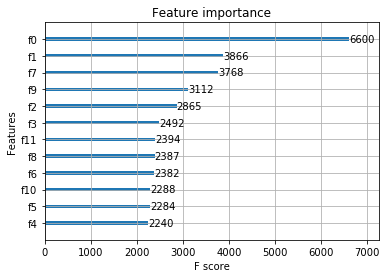

In [36]:
xgb.plot_importance(model)

In [37]:
r2_score(y_valid_split,model.predict(xgb.DMatrix(X_valid_split)))

0.5443294860369894